# Lab | Feature engineering

In this lab, you will use learningSet.csv file which you have already cloned in the previous activities.

### Instructions
Here we will work on cleaning some of the other columns in the dataset using the techniques that we used before in the lessons.

- Check for null values in the numerical columns.
- Use appropriate methods to clean the columns GEOCODE2, WEALTH1, ADI, DMA,and MSA.
- Use appropriate EDA technique where ever necessary.

### Imports

In [1]:
import numpy as np
import pandas as pd

from sklearn.impute import KNNImputer

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)

In [2]:
data = pd.read_csv("learningSet.csv")
print(data.shape)
data

/var/folders/_k/1xyh1kms5gg3dls55pm6gkwr0000gn/T/ipykernel_15487/2907035440.py:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("learningSet.csv")


(95412, 481)


,ODATEDW,OSOURCE,TCODE,STATE,ZIP,MAILCODE,PVASTATE,DOB,NOEXCH,RECINHSE,RECP3,RECPGVG,RECSWEEP,MDMAUD,DOMAIN,CLUSTER,AGE,AGEFLAG,HOMEOWNR,CHILD03,CHILD07,CHILD12,CHILD18,NUMCHLD,INCOME,GENDER,WEALTH1,HIT,MBCRAFT,MBGARDEN,MBBOOKS,MBCOLECT,MAGFAML,MAGFEM,MAGMALE,PUBGARDN,PUBCULIN,PUBHLTH,PUBDOITY,PUBNEWFN,PUBPHOTO,PUBOPP,DATASRCE,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,SOLP3,SOLIH,MAJOR,WEALTH2,GEOCODE,COLLECT1,VETERANS,BIBLE,CATLG,HOMEE,PETS,CDPLAY,STEREO,PCOWNERS,PHOTO,CRAFTS,FISHER,GARDENIN,BOATS,WALKER,KIDSTUFF,CARDS,PLATES,LIFESRC,PEPSTRFL,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,ADATE_2,ADATE_3,ADATE_4,ADATE_5,ADATE_6,ADATE_7,ADATE_8,ADATE_9,ADATE_10,ADATE_11,ADATE_12,ADATE_13,ADATE_14,ADATE_15,ADATE_16,ADATE_17,ADATE_18,ADATE_19,ADATE_20,ADATE_21,ADATE_22,ADATE_23,ADATE_24,RFA_2,RFA_3,RFA_4,RFA_5,RFA_6,RFA_7,RFA_8,RFA_9,RFA_10,RFA_11,RFA_12,RFA_13,RFA_14,RFA_15,RFA_16,RFA_17,RFA_18,RFA_19,RFA_20,RFA_21,RFA_22,RFA_23,RFA_24,CARDPROM,MAXADATE,NUMPROM,CARDPM12,NUMPRM12,RDATE_3,RDATE_4,RDATE_5,RDATE_6,RDATE_7,RDATE_8,RDATE_9,RDATE_10,RDATE_11,RDATE_12,RDATE_13,RDATE_14,RDATE_15,RDATE_16,RDATE_17,RDATE_18,RDATE_19,RDATE_20,RDATE_21,RDATE_22,RDATE_23,RDATE_24,RAMNT_3,RAMNT_4,RAMNT_5,RAMNT_6,RAMNT_7,RAMNT_8,RAMNT_9,RAMNT_10,RAMNT_11,RAMNT_12,RAMNT_13,RAMNT_14,RAMNT_15,RAMNT_16,RAMNT_17,RAMNT_18,RAMNT_19,RAMNT_20,RAMNT_21,RAMNT_22,RAMNT_23,RAMNT_24,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MINRDATE,MAXRAMNT,MAXRDATE,LASTGIFT,LASTDATE,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,TARGET_B,TARGET_D,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,CLUSTER2,GEOCODE2
0,8901,GRI,0,IL,61081,,,3712,0,,,,,XXXX,T2,36,60.0,,,,,,,NaN,NaN,F,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,0,39,34,18,10,2,1,,,,5.0,,,,,,,,,,,,,,,,,,,,,X,992,264,332,0,35,65,47,53,92,1,0,0,11,0,0,0,0,0,0,0,11,0,0,0,39,48,51,40,50,54,25,31,42,27,11,14,18,17,13,11,15,12,11,34,25,18,26,10,23,18,33,49,28,12,4,61,7,12,19,198,276,97,95,2,2,0,0,7,7,0,479,635,3,2,86,14,96,4,7,38,80,70,32,84,16,6,2,5,9,15,3,17,50,25,0,0,0,2,7,13,27,47,0,1,61,58,61,15,4,2,0,0,14,1,0,0,2,5,17,73,0.0,177.0,682.0,307,318,349,378,12883,13,23,23,23,15,1,0,0,1,4,25,24,26,17,2,0,0,2,28,4,51,1,46,54,3,88,8,0,0,0,0,0,0,4,1,13,14,16,2,45,56,64,50,64,44,62,53,99,0,0,9,3,8,13,9,0,3,9,3,15,19,5,4,3,0,3,41,1,0,7,13,6,5,0,4,9,4,1,3,10,2,1,7,78,2,0,120,16,10,39,21,8,4,3,5,20,3,19,4,0,0,0,18,39,0,34,23,18,16,1,4,0,23,0,0,5,1,0,0,0,0,0,2,0,3,74,88,8,0,4,96,77,19,13,31,5,14,14,31,54,46,0,0,90,0,10,0,0,0,33,65,40,99,99,6,2,10,7,9706,9606.0,9604.0,9604.

## Numerical NaNs

In [3]:
numerical = data.select_dtypes(np.number)
print(numerical.shape)
numerical

(95412, 407)


,ODATEDW,TCODE,DOB,AGE,NUMCHLD,INCOME,WEALTH1,HIT,MBCRAFT,MBGARDEN,MBBOOKS,MBCOLECT,MAGFAML,MAGFEM,MAGMALE,PUBGARDN,PUBCULIN,PUBHLTH,PUBDOITY,PUBNEWFN,PUBPHOTO,PUBOPP,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,WEALTH2,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,ADATE_2,ADATE_3,ADATE_4,ADATE_5,ADATE_6,ADATE_7,ADATE_8,ADATE_9,ADATE_10,ADATE_11,ADATE_12,ADATE_13,ADATE_14,ADATE_15,ADATE_16,ADATE_17,ADATE_18,ADATE_19,ADATE_20,ADATE_21,ADATE_22,ADATE_23,ADATE_24,CARDPROM,MAXADATE,NUMPROM,CARDPM12,NUMPRM12,RDATE_3,RDATE_4,RDATE_5,RDATE_6,RDATE_7,RDATE_8,RDATE_9,RDATE_10,RDATE_11,RDATE_12,RDATE_13,RDATE_14,RDATE_15,RDATE_16,RDATE_17,RDATE_18,RDATE_19,RDATE_20,RDATE_21,RDATE_22,RDATE_23,RDATE_24,RAMNT_3,RAMNT_4,RAMNT_5,RAMNT_6,RAMNT_7,RAMNT_8,RAMNT_9,RAMNT_10,RAMNT_11,RAMNT_12,RAMNT_13,RAMNT_14,RAMNT_15,RAMNT_16,RAMNT_17,RAMNT_18,RAMNT_19,RAMNT_20,RAMNT_21,RAMNT_22,RAMNT_23,RAMNT_24,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MINRDATE,MAXRAMNT,MAXRDATE,LASTGIFT,LASTDATE,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,TARGET_B,TARGET_D,HPHONE_D,RFA_2F,CLUSTER2
0,8901,0,3712,60.0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,39,34,18,10,2,1,5.0,992,264,332,0,35,65,47,53,92,1,0,0,11,0,0,0,0,0,0,0,11,0,0,0,39,48,51,40,50,54,25,31,42,27,11,14,18,17,13,11,15,12,11,34,25,18,26,10,23,18,33,49,28,12,4,61,7,12,19,198,276,97,95,2,2,0,0,7,7,0,479,635,3,2,86,14,96,4,7,38,80,70,32,84,16,6,2,5,9,15,3,17,50,25,0,0,0,2,7,13,27,47,0,1,61,58,61,15,4,2,0,0,14,1,0,0,2,5,17,73,0.0,177.0,682.0,307,318,349,378,12883,13,23,23,23,15,1,0,0,1,4,25,24,26,17,2,0,0,2,28,4,51,1,46,54,3,88,8,0,0,0,0,0,0,4,1,13,14,16,2,45,56,64,50,64,44,62,53,99,0,0,9,3,8,13,9,0,3,9,3,15,19,5,4,3,0,3,41,1,0,7,13,6,5,0,4,9,4,1,3,10,2,1,7,78,2,0,120,16,10,39,21,8,4,3,5,20,3,19,4,0,0,0,18,39,0,34,23,18,16,1,4,0,23,0,0,5,1,0,0,0,0,0,2,0,3,74,88,8,0,4,96,77,19,13,31,5,14,14,31,54,46,0,0,90,0,10,0,0,0,33,65,40,99,99,6,2,10,7,9706,9606.0,9604.0,9604.0,9603.0,9602.0,9601.0,9511.0,9510.0,9510.0,9508.0,9507.0,9506.0,9504.0,9503.0,9502.0,9501.0,9411.0,9411.0,9410.0,9409.0,9407.0,9406.0,27,9702,74,6,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9512.0,NaN,NaN,NaN,9507.0,9505.0,9505.0,9503.0,NaN,NaN,NaN,NaN,NaN,9408.0,9406.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,10.0,11.0,11.0,11.0,NaN,NaN,NaN,NaN,NaN,11.0,9.0,240.0,31,14,5.0,9208,12.0,9402,10.0,9512,8911,9003.0,4.0,7.741935,95515,0,0.0,0,4,39.0
1,9401,1,5202,46.0,1.0,6.0,9.0,16,0.0,0.0,3.0,1.0,1.0,1.0,0.0,0.0,0.0,2.0,0.0,3.0,0.0,0.0,0,15,55,11,6,2,1,9.0,3611,940,998,99,0,0,50,50,67,0,0,31,6,4,2,6,4,14,0

In [4]:
num_cols = pd.DataFrame(numerical.isna().sum()/len(numerical)).reset_index()
num_cols.columns = ["Cols", "NaNs"]
num_cols[num_cols["NaNs"] > 0]

,Cols,NaNs
3,AGE,0.248030
4,NUMCHLD,0.870184
5,INCOME,0.223096
6,WEALTH1,0.468830
8,MBCRAFT,0.553955
...,...,...
386,RAMNT_23,0.917631
387,RAMNT_24,0.814090
398,NEXTDATE,0.104526
399,TIMELAG,0.104526


### Previous study

(GEOCODE is NOT considered a numerical columns (it is a categorical))

In [5]:
cols_to_clean = numerical[['WEALTH1', 'ADI', 'DMA', 'MSA']]
list_toclean = pd.DataFrame(cols_to_clean.isna().sum()/len(data)).reset_index()
list_toclean.columns = ['column_name', 'nulls_percentage']
list_toclean

,column_name,nulls_percentage
0,WEALTH1,0.468830
1,ADI,0.001383
2,DMA,0.001383
3,MSA,0.001383


## GEOCODE2: Country Size Cod

Geocode2 column is NOT considered as numerical type.
We will consider the inclusion of "" as missing values, so we will drop the those rows

In [6]:
#print("Unique values:", data["GEO"])
data["GEOCODE2"].value_counts(dropna = False)

A      34484
B      28505
D      16580
C      15524
         187
NaN      132
Name: GEOCODE2, dtype: int64

We will now replace white spaces (" ") with nans

In [7]:
data["GEOCODE2"] = data["GEOCODE2"].replace(" ", np.nan)
data["GEOCODE2"].value_counts(dropna=False)

A      34484
B      28505
D      16580
C      15524
NaN      319
Name: GEOCODE2, dtype: int64

We will imput NaN values with the mode as it's number is relatively low

In [8]:
mode_geocode2 = data['GEOCODE2'].mode()[0]
print('Mode value:', mode_geocode2)

Mode value: A


In [9]:
data['GEOCODE2'] = data['GEOCODE2'].fillna(mode_geocode2)
data['GEOCODE2'].value_counts(dropna=False)

A    34803
B    28505
D    16580
C    15524
Name: GEOCODE2, dtype: int64

## WEALTH1: Wealth Rating

In [10]:
numerical['WEALTH1'].value_counts(dropna=False)

NaN    44732
9.0     7585
8.0     6793
7.0     6198
6.0     5825
5.0     5280
4.0     4810
3.0     4237
2.0     4085
1.0     3454
0.0     2413
Name: WEALTH1, dtype: int64

In [11]:
wealth1_null_percentage = (numerical['WEALTH1'].isna().sum()/len(numerical))*100
wealth1_null_percentage

46.882991657233895

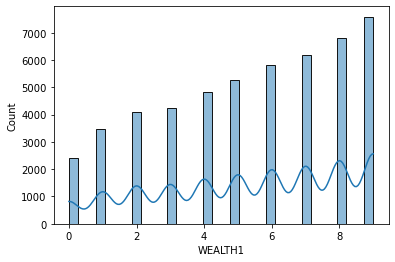

In [12]:
sns.histplot(numerical[numerical['WEALTH1'].isna()==False]['WEALTH1'],kde=True) 
plt.show()

We can observe that there are A LOT of missing values, close to 50%

In [13]:
numerical['WEALTH1_PLOTS'] = numerical['WEALTH1'].copy()
mean = np.mean(numerical['WEALTH1'].notna())
print('Mean:', mean)
median = np.median(numerical['WEALTH1'].notna())
print('Median:', median)

Mean: 0.5311700834276611
Median: 1.0


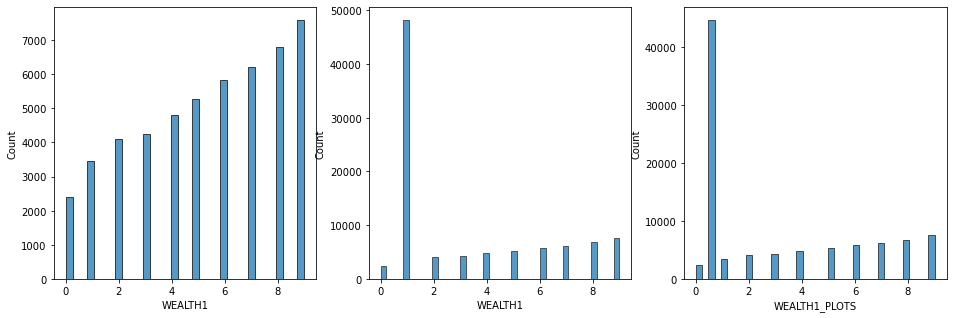

In [14]:
fig, ax = plt.subplots(1,3,figsize=(16,5))
sns.histplot(numerical['WEALTH1'], ax = ax[0])
sns.histplot(numerical["WEALTH1"].fillna(median), ax = ax[1])
sns.histplot(numerical['WEALTH1_PLOTS'].fillna(mean),ax = ax[2])
plt.show()

Neither option is convicing enough...
We will replace nulls for the median, although maybe we could consider filling them out with values of related columns.

In [15]:
numerical['WEALTH1'] = numerical['WEALTH1'].fillna(median)
numerical['WEALTH1'].isna().sum()

0

## ADI


In [16]:
print("Unique values:", numerical["ADI"].unique())
numerical["ADI"].value_counts(dropna=False)

Unique values: [177.  13. 281.  67. 127. 185.  91. 251. 391. 181. 269.  83. 107. 249.
 291.  57. 227. 329. 351.  55. 133.  51.  73. 159. 201.  75. 233. 591.
 203. 175.  59. 105. 111. 173. 415. 323. 187.  65. 412. 109. 425. 405.
 197. 279. 645. 207.  89. 361. 209. 213.  15.  21. 113. 131. 469. 199.
 129. 441. 459. 235. 301.  39. 429. 285. 245. 335. 393. 577. 439. 455.
 383. 263.   0. 427. 307. 275. 119. 229. 273. 325. 371. 377. 315. 342.
 421. 219.  61.  93. 375. 283. 381. 243. 353. 613. 339. 367. 417. 299.
 271. 157.  77. 327.  53.  87. 451. 627.  71. 253. 363. 403. 115. 389.
  63. 321. 448. 237. 217. 241. 123. 221. 165. 277.  85. 319. 247.  69.
 379.  95.  17. 625. 462. 303. 179. 331. 231. 337. 257. 409. 457. 359.
 373.  nan 413. 215. 205. 313. 211. 305. 355. 419. 473. 423. 121. 433.
 431. 465. 445.  19. 467. 255. 437. 117. 449. 195. 435. 621. 295.  11.
 183. 265. 317.   9.   3. 151. 471. 293. 297. 603. 385.  33. 261.  25.
 443.  29. 357. 135.  35. 143. 153. 149.  47. 140.  43. 141. 2

13.0     7296
51.0     4622
65.0     3765
57.0     2836
105.0    2617
         ... 
651.0       1
103.0       1
601.0       1
161.0       1
147.0       1
Name: ADI, Length: 205, dtype: int64

In [17]:
adi_null_percent = (numerical["ADI"].isna().sum()/len(numerical))*100
print("Percentage of NaN values:", round(adi_null_percent, 2))

Percentage of NaN values: 0.14


## DMA

In [18]:
print('Unique values:', numerical['DMA'].unique())
numerical['DMA'].value_counts(dropna=False)

Unique values: [682. 803. 518. 862. 528. 691. 509. 643. 624. 659. 671. 527. 613. 716.
 770. 505. 717. 534. 560. 547. 571. 602. 800. 638. 618. 609. 820. 821.
 635. 675. 563. 819. 617. 637. 606. 709. 632. 807. 698. 623. 507. 627.
 524. 517. 539. 649. 868. 546. 529. 567. 825. 512. 669. 764. 575. 548.
 662. 811. 801. 652. 771. 603. 556. 622. 561. 724. 804. 633. 839. 686.
 650. 743. 619. 678. 753. 610. 745. 604. 749. 670. 765. 711. 553. 762.
 520. 503. 551. 515. 647. 544.   0. 676. 752. 545. 754. 810. 790. 656.
 755. 641. 616. 628. 588. 581. 540. 658. 583. 866. 642. 746. 634. 648.
 705. 725. 744. 513. 612. 813. 531. 751. 500. 630. 611. 789. 582. 693.
 692. 828. 626. 710. 542. 855. 687. 679. 640. 722. 620. 881. 564. 522.
 756. 570. 718.  nan 530. 557. 625. 541. 657. 631. 550. 525. 605. 773.
 519. 535. 600. 734. 759. 757. 511. 798. 802. 644. 651. 702. 737. 767.
 673. 736. 636. 592. 758. 504. 639. 501. 506. 523. 760. 766. 646. 740.
 574. 598. 533. 661. 508. 537. 514. 510. 577. 549. 532. 521. 5

803.0    7296
602.0    4632
807.0    3765
505.0    2839
819.0    2588
         ... 
569.0       1
554.0       1
584.0       1
552.0       1
516.0       1
Name: DMA, Length: 207, dtype: int64

In [19]:
dma_null_percent = (numerical['DMA'].isna().sum()/len(numerical))*100
print('Percentage of NaN values:', round(dma_null_percent,2))

Percentage of NaN values: 0.14


## MSA

In [20]:
print('Unique values:', numerical['MSA'].unique())
numerical['MSA'].value_counts(dropna=False)

Unique values: [   0. 4480. 9340. 5000. 2030. 3960. 5360. 3480.  760. 2160. 5960. 5120.
  440. 6580. 1600.  680. 3360. 7040. 2920. 3120. 6440.  640. 6120. 3000.
 7600. 2680. 5080. 1360. 2180. 4420. 1960. 6640. 7360. 5945. 1920. 1145.
 7520. 2800. 1520. 7510. 1620. 4520. 7320.  720. 4720. 1560. 8960.   40.
 6720.  520. 9360. 3710. 8280. 6760. 3160. 5560. 3600. 6780. 5800. 4120.
 5160. 5880.  380. 3440. 2710. 2020. 9040. 6200. 6880. 6920. 2760. 7080.
 4080. 2580. 4100. 5790. 4200.  600. 4680. 4040. 1640. 5775. 8720. 3980.
 2240. 1720. 5910. 9260.  200. 7400. 1020. 3290. 2720. 7240. 3800. 8120.
  870. 2320. 3760. 1040. 2840. 3880.  920. 6080.  460.  320. 1400. 3320.
 2640. 8200. 4890. 3660. 2670. 1000. 2520. 2440. 8520. 3720. 2080. 7500.
 3920. 1125. 4400.  840. 7485. 8750. 8735. 1150. 5280. 3285. 7460. 2620.
 7160. 4920. 8600.  880. 2985. 5920. 2655. 3560.   nan 3500. 7720. 7480.
  860. 2330. 7680. 5200. 3400. 3605. 2750. 8240. 3080. 5170. 3150.  480.
 6660. 3840. 2120. 3810. 2960. 7840.

0.0       21333
4480.0     4606
1600.0     4059
2160.0     2586
520.0      1685
          ...  
9140.0        1
3200.0        1
9280.0        1
743.0         1
8480.0        1
Name: MSA, Length: 299, dtype: int64

In [21]:
msa_null_percent = (numerical['MSA'].isna().sum()/len(numerical))*100
print('Percentage of NaN values:', round(msa_null_percent,2))

Percentage of NaN values: 0.14


It is suspicious that all tree have the exact same percentage of NaN values. We should give that an eye.

In [22]:
nan_rows = numerical[numerical['MSA'].isna()]
nan_rows[["ADI", "MSA", "DMA"]]

,ADI,MSA,DMA
577,NaN,NaN,NaN
1119,NaN,NaN,NaN
2250,NaN,NaN,NaN
3326,NaN,NaN,NaN
5558,NaN,NaN,NaN
...,...,...,...
90627,NaN,NaN,NaN
90993,NaN,NaN,NaN
92870,NaN,NaN,NaN
93624,NaN,NaN,NaN


They contain the exact same NaN values for the exact same rows, so we can drop them.

In [23]:
nan_rows_idx = list(nan_rows.index)
nan_rows_idx
#numerical.drop(nan_rows_idx, axis = 0, inplace = True)

[577,
 1119,
 2250,
 3326,
 5558,
 5767,
 6615,
 7225,
 7883,
 9279,
 9795,
 11971,
 12205,
 12390,
 12572,
 12573,
 14117,
 17098,
 18650,
 18715,
 19179,
 19564,
 21019,
 21206,
 21266,
 22543,
 22846,
 23486,
 24765,
 26624,
 26801,
 26981,
 28012,
 28409,
 28771,
 29193,
 30066,
 30138,
 31184,
 31426,
 31507,
 31668,
 34233,
 34867,
 35664,
 35678,
 35787,
 36410,
 36990,
 37117,
 37324,
 37694,
 38561,
 40107,
 42014,
 42919,
 43696,
 44455,
 45030,
 47563,
 47585,
 48232,
 48347,
 48712,
 48759,
 49003,
 49843,
 50244,
 50322,
 50686,
 50918,
 51269,
 51420,
 51644,
 51872,
 53021,
 53398,
 54222,
 55138,
 56311,
 56799,
 57015,
 57481,
 59045,
 59698,
 60643,
 62209,
 64293,
 64356,
 65014,
 65256,
 65358,
 66553,
 66662,
 67211,
 68255,
 69377,
 69547,
 69943,
 70653,
 73569,
 75117,
 75445,
 75968,
 76193,
 76412,
 76685,
 76852,
 78081,
 78706,
 78870,
 78979,
 81189,
 81749,
 82520,
 83117,
 83472,
 83857,
 83937,
 84044,
 84622,
 84821,
 86153,
 86243,
 86307,
 89083,
 899

In [ ]:
nan_rows[["ADI", "MSA", "DMA"]]